# T6 Regression analysis

## Linear regression 

We are given two generic data-sets consisting of observations at diffferent values of x. The task is to determine whether there exists a linear relationship between the independent variable x and the variable y? In other words, perform a linear regression analysis on the data-sets and determine whether changes in the independent variable predict changes in the dependent variable. 


The data is provided in the two files `data1-regression.npy` and `data2-regression.npy`. Remember that numpy binary files can loaded with `np.load([name of file])`. 




#### Performing regression analysis 'by hand'

Let's start by performing the regression analysis 'by hand', which means that we will successively perform the steps. 

1. Let's start by plotting both data-sets. Based on visual inspection, do you expect none, one or both data-sets to exhibit a relationship? 
1. Let's fit at line to the data using the numpy `polyfit()` function. This function takes, x, y and the degree of the polynomial function as input arguments and returns the polynomial coefficients. 
* Calculate the predicted values based on the linear fit. The numpy `polyval()` function can be used for that, it takes the polynomial coefficients and the x values as input arguments. 
* Plot both, the cloud of data and the fitted line. 
* Calculate the $R^2$ value. Note that this requires to calculate the total sum of squares $SS_{tot}$ and the residual sum of squares $SS_{res}$. Check the formula for $R^2$ from the lecture. 
* Plot the residual of both data-sets. What can you say about the statistics of the residuals? 

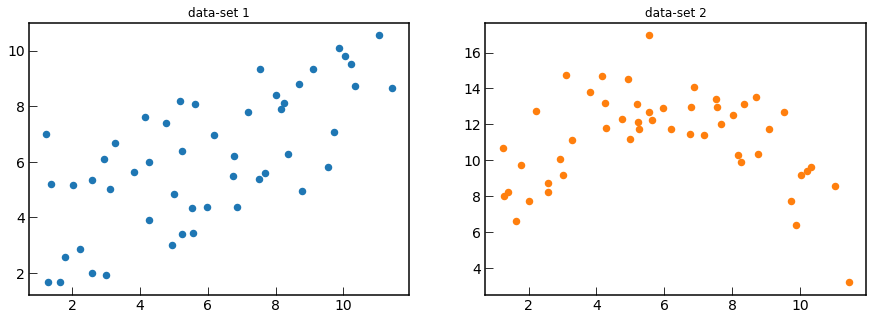

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data1 = np.load('data1-regression.npy')
data2 = np.load('data2-regression.npy')

fig = plt.figure(figsize=(15,5))

ax0 = fig.add_subplot(1,2,1)
ax0.set_title('data-set 1')
ax0.plot(data1[:,0],data1[:,1],'o')

ax1 = fig.add_subplot(1,2,2)
ax1.set_title('data-set 2')
ax1.plot(data2[:,0],data2[:,1],'o',c='C1')

plt.show()

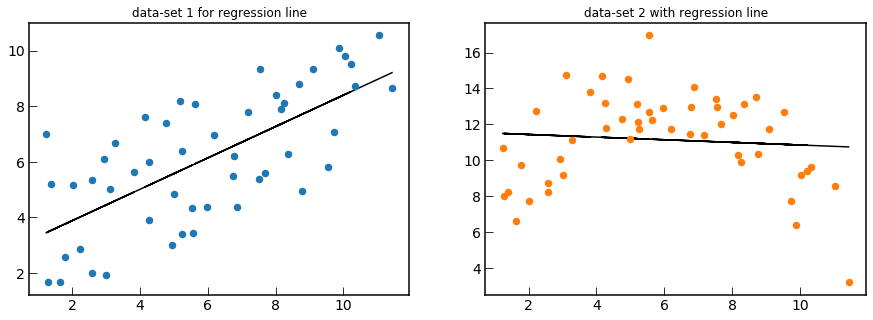

In [2]:
coeffs1 = np.polyfit(data1[:,0],data1[:,1],1)
coeffs2 = np.polyfit(data2[:,0],data2[:,1],1)

yPredict1 = np.polyval(coeffs1,data1[:,0])
yPredict2 = np.polyval(coeffs2,data2[:,0])

fig = plt.figure(figsize=(15,5))

ax0 = fig.add_subplot(1,2,1)
ax0.set_title('data-set 1 for regression line')
ax0.plot(data1[:,0],yPredict1,'black')
ax0.plot(data1[:,0],data1[:,1],'o')

ax1 = fig.add_subplot(1,2,2)
ax1.set_title('data-set 2 with regression line')
ax1.plot(data2[:,0],yPredict2,'black')
ax1.plot(data2[:,0],data2[:,1],'o',c='C1')

plt.show()


In [3]:
SStot1 = np.sum((data1[:,1] - np.mean(data1[:,1]))**2)
SSres1 = np.sum((data1[:,1] - yPredict1)**2)
Rsquared1 = 1 - SSres1/SStot1

SStot2 = np.sum((data2[:,1] - np.mean(data2[:,1]))**2)
SSres2 = np.sum((data2[:,1] - yPredict2)**2)
Rsquared2 = 1 - SSres2/SStot2

print('R2 of data-set 1 : ',Rsquared1)
print('R2 of data-set 2 : ',Rsquared2)


R2 of data-set 1 :  0.48040822307112685
R2 of data-set 2 :  0.006931627473827029


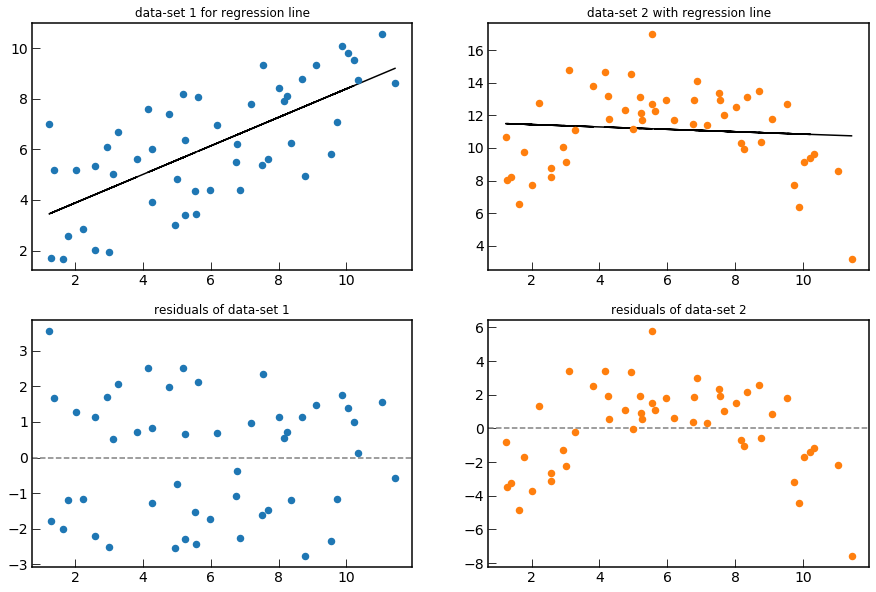

In [4]:
fig = plt.figure(figsize=(15,10))

ax0 = fig.add_subplot(2,2,1)
ax0.set_title('data-set 1 for regression line')
ax0.plot(data1[:,0],yPredict1,'black')
ax0.plot(data1[:,0],data1[:,1],'o')

ax2 = fig.add_subplot(2,2,3)
ax2.set_title('residuals of data-set 1')
ax2.axhline(y=0,ls='--',c='0.5')
ax2.plot(data1[:,0],data1[:,1]- yPredict1,'o')

ax1 = fig.add_subplot(2,2,2)
ax1.set_title('data-set 2 with regression line')
ax1.plot(data2[:,0],yPredict2,'black')
ax1.plot(data2[:,0],data2[:,1],'o',c='C1')

ax3 = fig.add_subplot(2,2,4)
ax3.set_title('residuals of data-set 2')
ax3.axhline(y=0,ls='--',c='0.5')
ax3.plot(data2[:,0],data2[:,1]- yPredict2,'o',c='C1')

plt.show()

**Note** that the residuals of data-set 2 show some systematic error, i.e., they are not scattered randomly around zero. Rather, they are initially negative, mostly postive at intermediate values of x and mostly negative for large values of x. Such a bias in the residuals means that a linear regression is not a good model to describe the data. 

#### Performing regression using precompiled scipy function

Let's now perform the regression analysis using the `scipy.stats` function : `linregress()`. This function takes the x and the y values as input arguments. Compare the results  of `linregress()` with the polynomial coefficients and the $R^2$ values caluclated above. 

In [5]:
from scipy.stats import linregress

out1 = linregress(data1[:,0],data1[:,1])
print(out1,'R2 : ',out1[2]**2)
print('from above:',coeffs1,Rsquared1)
print()
out2 = linregress(data2[:,0],data2[:,1])
print(out2,'R2 : ',out2[2]**2)
print('from above:',coeffs2,Rsquared2)

LinregressResult(slope=0.5646252249395204, intercept=2.7531379734346424, rvalue=0.6931148700404046, pvalue=2.4277012639202654e-08, stderr=0.08475504841128581) R2 :  0.48040822307112696
from above: [0.56462522 2.75313797] 0.48040822307112685

LinregressResult(slope=-0.07350698354253545, intercept=11.584252499850539, rvalue=-0.08325639599350382, pvalue=0.5654124412101937, stderr=0.12699304908639886) R2 :  0.006931627473827118
from above: [-0.07350698 11.5842525 ] 0.006931627473827029


## Logistic regression 

We have a data-set (stored in the variable `data3`) which contains data on how students passed a test. The x values are hours spent preparing for an exam and the y-values inform whether or not the student passed the exam. In turn, the y-values are 
binary taking either 0 - the student didn't pass the test - or 1 - the student passed the test - as values. Let's perform a logistic regression on this data-set. The result will help us decide how much time we should spend preparing the exam in order to have a good chance succeeding. 

In [6]:
data3 = np.array(([12,12.5,13.2,14,14.7,15.5,15.9,16.5,16.8,17,17.1,17.7,17.9,18.1,18.2,18.8,19.8,20.3,20.8,21,22],
                 [0,0,0,0,0,0,0,1,0,1,0,0,1,1,1,1,1,1,1,1,1]))

#### Perform logistic regression using scikit-learn function 

1. Plot the data. Based on visual inspection, how much time should you invest to have a good chance of passing the exam?

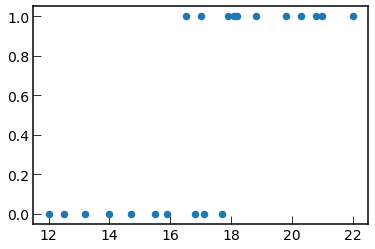

In [7]:
plt.plot(data3[0],data3[1],'o')

One should spend something like 17 to 18 hours preparing the exam to have a good chance of passing it. 

2. Perfrom the logistic regression using the code below. 

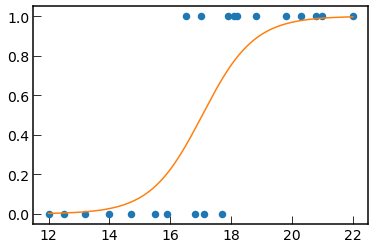

In [8]:
from sklearn.linear_model import LogisticRegression

displacement = np.mean(data3[0])

logRegression = LogisticRegression(solver='lbfgs')
logRegression.fit(data3[0].reshape(len(data3[0]),1)-displacement,data3[1])

x_pred = np.linspace(data3[0].min()-displacement,data3[0].max()-displacement,1000)
y_pred = logRegression.predict_proba(x_pred.reshape(len(x_pred),1))

plt.plot(data3[0],data3[1],'o')
plt.plot(x_pred+displacement,y_pred[:,1])
plt.show()


3. Based on the logistic regression, how much time should you invest preparing the exam in order to have a 50 % change or more to pass the test? 

In [9]:
mask = y_pred[:,1]>=0.5  # mask to get all predicted values of 0.5 and larger 
hoursHalf = (x_pred+displacement)[mask][0]

print('One should spend',np.round(hoursHalf,1),' hours to have a 50% chance to pass the exam.')

One should spend 17.1  hours to have a 50% chance to pass the exam.


## The end